Iris Cambier 

Tâche 8

### Imports

In [76]:
from pymatgen import Lattice, Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.site_symmetries import *
from pymatgen.io.cif import CifWriter
from pymatgen.io.vasp import Poscar
from pymatgen.io.cif import CifParser
from jupyter_jsmol.pymatgen import quick_view
from IPython.display import Image
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

## Téléchargement du fichier bande du MoSe2

In [77]:
with MPRester("h54Ug2jjGzJ0JQCCfHsG") as m:

    # Structure for material id
    structure = m.get_bandstructure_by_material_id("mp-7581")

## Graphe de la structure électronique des bandes

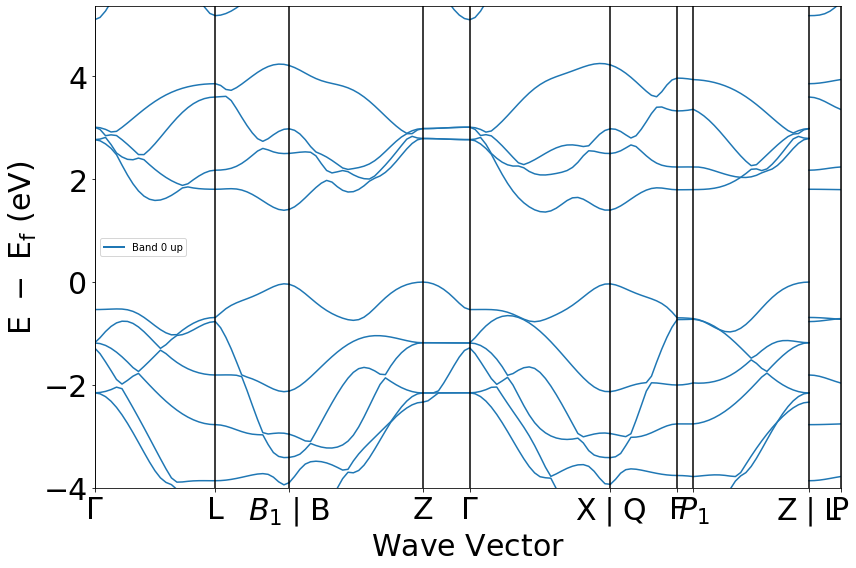

In [78]:
plot = BSPlotter(structure)
plot.show()
gap = structure.get_band_gap()

## Représentation de la zone de Brillouin étudiée

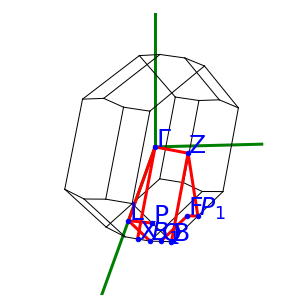

In [79]:
BSPlotter(structure).plot_brillouin()

## Détermination de la bande interdite

In [115]:
print("La bande interdite est directe :", gap['direct'],", ce qui veut dire que la bande interdite est indirecte comme nous pouvons l'observer sur le graphe.")
print("La largeur de la bande interdite est de :", gap['energy'], "eV")
print("Le déplacement du vecteur d'onde vaut donc :", gap['transition'])

La bande interdite est directe : False , ce qui veut dire que la bande interdite est indirecte comme nous pouvons l'observer sur le graphe.
La largeur de la bande interdite est de : 1.3619999999999997 eV
Le déplacement du vecteur d'onde vaut donc : Z-(0.183,0.000,-0.183)


## Direction dans laquelle la dernière bande de valence présente le plus et le moins de dispersion    

In [81]:
print(structure.get_vbm()['band_index'],"\n")
print("La bande numéro 11 a la plus grande énergie de la bande de valence \n")
print(structure.get_cbm()['band_index'],"\n")  
print("La bande numéro 12 a la plus basse énergie de la bande de conduction")

defaultdict(<class 'list'>, {<Spin.up: 1>: [11]}) 

La bande numéro 11 a la plus grande énergie de la bande de valence 

defaultdict(<class 'list'>, {<Spin.up: 1>: [12]}) 

La bande numéro 12 a la plus basse énergie de la bande de conduction


In [119]:
infos = plot.bs_plot_data()
energy = infos.get('energy')['1']
distance = infos.get('distances')

index = 11

inf = 100
sup = -100

for i in range (9): 
    delta = abs(((energy[i][index][-1]-energy[i][index][0]))/(distance[i][-1]-distance[i][0]))
    if (delta < inf ):
        inf = delta
        indice_inf = i 
    if (delta > sup):
        sup = delta
        indice_sup = i
        
print('Delta maximum : ', sup ,'pour indice qui vaut :', indice_sup)
print('Delta minimum : ', inf, 'pour indice qui vaut :', indice_inf)

Delta maximum :  1.2533617436558553 pour indice qui vaut : 3
Delta minimum :  0.035447746266447484 pour indice qui vaut : 2


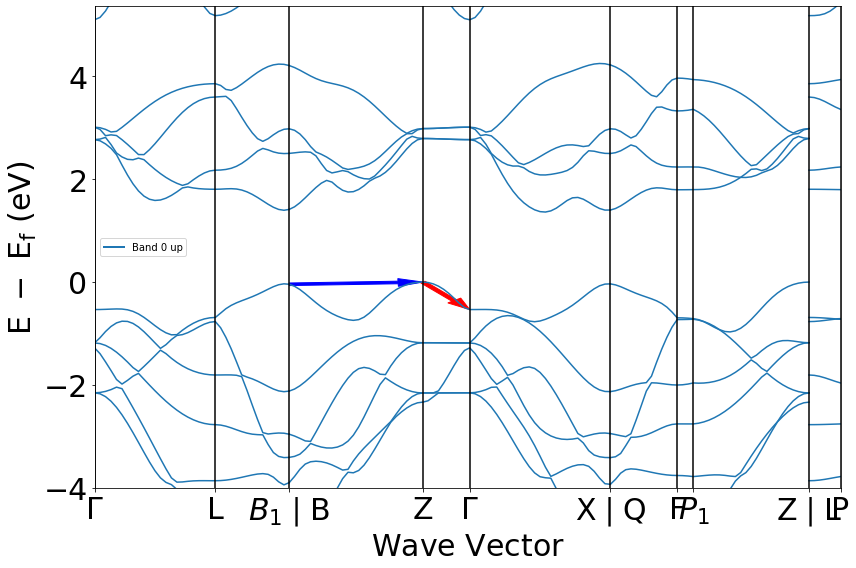

In [83]:
dist0 = distance[indice_inf][0]
dist1 = distance[indice_inf][-1]
dist2 = distance[indice_sup][0]
dist3 = distance[indice_sup][-1]
energy0 = energy[indice_inf][index][0]
energy1 = energy[indice_inf][index][-1]
energy2 = energy[indice_sup][index][0]
energy3 = energy[indice_sup][index][-1]

pl = BSPlotter(structure).get_plot()

plt.arrow(dist0,energy0,dist1 - dist0, energy1 - energy0,color='b',width=0.05,length_includes_head=True)
#plt.arrow(dist2,energy2,dist3 - dist2, energy3 - energy2,color='r',width=0.05,length_includes_head=True)
plt.arrow(distance[indice_sup][0],energy[indice_sup][index][0], distance[indice_sup][-1] - distance[indice_sup][0], energy[indice_sup][index][-1] - energy[indice_sup][index][0],color='r',width=0.05,length_includes_head=True)

Pour la dernière bande de valence, la dispersion minimale a lieu sur B1|B - Z et vaut 0.035447746266447484 (flèche bleue).
Pour la dernière bande de valence, la dispersion maximale a lieu sur Z - Γ et vaut 1.2533617436558553 (flèche rouge).

## Direction dans laquelle la première bande de conduction présente le plus et le moins de dispersion    

In [120]:
infos = plot.bs_plot_data()
energy = infos.get('energy')['1']
distance = infos.get('distances')

index = 12

inf1 = 100
sup1 = -100

for i in range (9): 
    delta = abs(((energy[i][index][-1]-energy[i][index][0]))/(distance[i][-1]-distance[i][0]))
    if (delta < inf1 ):
        inf1 = delta
        indice_inf1 = i 
    if (delta > sup1):
        sup1 = delta
        indice_sup1 = i
        
print('Delta maximum : ', sup1,'pour indice qui vaut :', indice_sup1)
print('Delta minimum : ', inf1,'pour indice qui vaut :', indice_inf1)

Delta maximum :  1.1344101258772878 pour indice qui vaut : 2
Delta minimum :  0.01768782959445436 pour indice qui vaut : 6


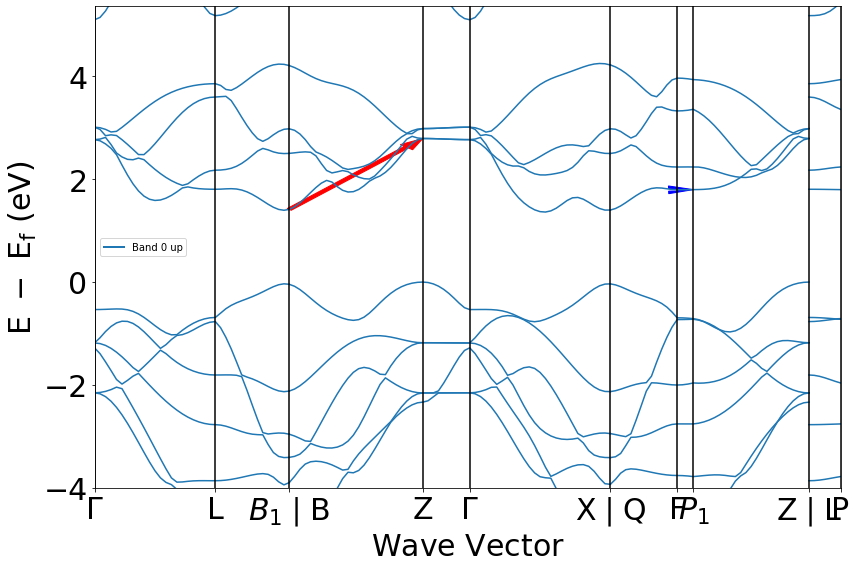

In [88]:
pl = BSPlotter(structure).get_plot()

plt.arrow(distance[indice_sup1][0],energy[indice_sup1][index][0], distance[indice_sup1][-1] - distance[indice_sup1][0], energy[indice_sup1][index][-1] - energy[indice_sup1][index][0],color='r',width=0.05,length_includes_head=True)
plt.arrow(distance[indice_inf1][0],energy[indice_inf1][index][0], distance[indice_inf1][-1] - distance[indice_inf1][0], energy[indice_inf1][index][-1] - energy[indice_inf1][index][0],color='b',width=0.05,length_includes_head=True)


Pour la première bande de conduction, la dispersion minimale a lieu sur  F - P1 et vaut 0.01768782959445436 (flèche bleue). Pour la première bande de conduction, la dispersion maximale a lieu sur B1|B - Z et vaut 1.1344101258772878 (flèche rouge).


## Calcul de la masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique

"On décrit les électrons comme des particules libres dont la masse effective varie, plutôt que des particules de masse fixée évoluant dans un potentiel. Cette masse effective peut être positive ou négative et inférieure ou supérieure à la masse réelle de l'électron. On définit la masse effective par le tenseur d'ordre 2 des dérivées secondes de l'énergie E par rapport au vecteur d'onde k" (Cours Physique des matériaux du Pr. Rignanese)

Voici la formule pour calculer la masse effective : 

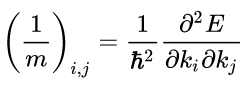

In [113]:
Image(filename = 'formule.PNG')

On aura bien une valeur constante pour m car E(k) = ak^2 + bk + c donc sa dérivée seconde sera 2 * le coefficient a. On va chercher E(k) par interpolation polynomiale passant par 3 points.

In [114]:
#interpolation par 3 points car plus précis que 2 points 

[x1,y1] = [distance[indice_sup][0],energy[indice_sup][11][0]]     
[x2,y2] = [distance[indice_sup+4][0],energy[indice_sup+4][11][0]] 
[x3,y3] = [distance[indice_sup+1][0],energy[indice_sup+1][11][0]] 

a, b, c = np.polyfit([x1, x2, x3], [y1, y2, y3], 2)        
                                
masse = (1.054571818*10**(-34))**2/(2*a*(10**(-20)*1.602176563*10**(-19)))                        
print('masse effective = ', masse, 'kg')

masse effective =  7.323954052260446e-30 kg


Nous remarquons que notre réponse varie en fonction des points que nous choisissons pour l'interpolation de la parabole, c'est normal et comme nous sommes avec un exposant -30, les variations ne sont que très minimes. 

## Calcul de la masse effective à la base de la première bande de conduction en supposant une dispersion parabolique

In [111]:
#interpolation par 3 points car plus précis que 2 points 

[x1,y1] = [distance[indice_inf1][0],energy[indice_inf1][12][0]]     
[x2,y2] = [distance[indice_inf1-2][0],energy[indice_inf1-2][12][0]] 
[x3,y3] = [distance[indice_inf1+2][0],energy[indice_inf1+2][12][0]] 

a, b, c = np.polyfit([x1, x2, x3], [y1, y2, y3], 2)        
                                
masse = (1.054571818*10**(-34))**2/(2*a*(10**(-20)*1.602176563*10**(-19)))                        
print('masse effective = ', masse, 'kg')

masse effective =  2.04393467157309e-29 kg


Sans surprise, on observe à nouveau (comme dans le cas de la dernière bande de valence) que notre choix des points pour l'interpolation affecte notre réponse pour la masse effective.